In [72]:
!pip install openpyxl

In [73]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [74]:
df = pd.read_excel("EastWestAirlines.xlsx", engine='openpyxl',sheet_name='data')

In [75]:
df.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1


In [76]:
df.dtypes

ID#                  int64
Balance              int64
Qual_miles           int64
cc1_miles            int64
cc2_miles            int64
cc3_miles            int64
Bonus_miles          int64
Bonus_trans          int64
Flight_miles_12mo    int64
Flight_trans_12      int64
Days_since_enroll    int64
Award?               int64
dtype: object

In [77]:
df.isnull().sum()

ID#                  0
Balance              0
Qual_miles           0
cc1_miles            0
cc2_miles            0
cc3_miles            0
Bonus_miles          0
Bonus_trans          0
Flight_miles_12mo    0
Flight_trans_12      0
Days_since_enroll    0
Award?               0
dtype: int64

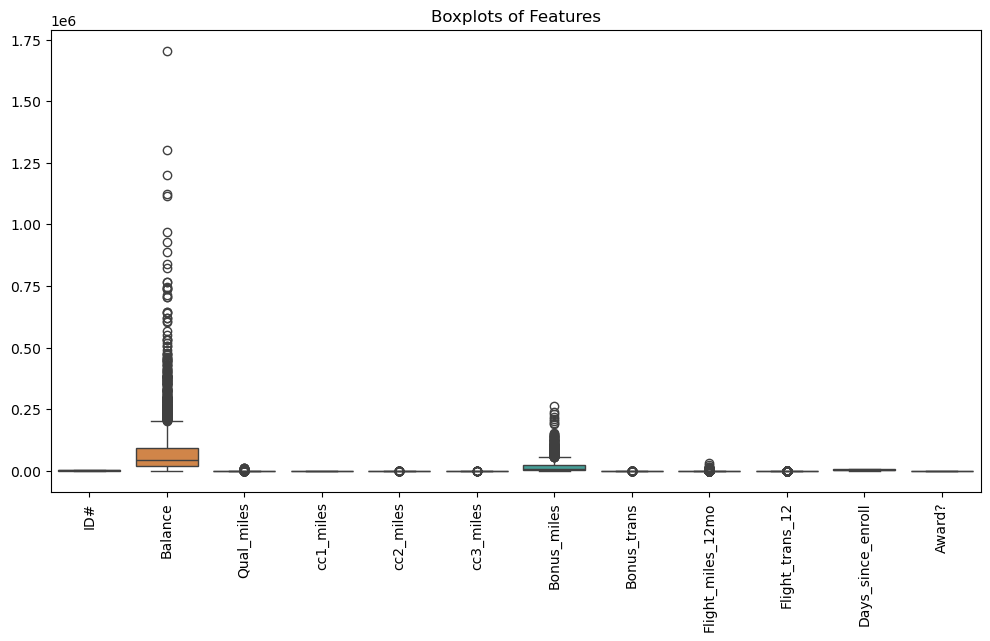

In [78]:
plt.figure(figsize = (12, 6))
sns.boxplot(data=df)
plt.title("Boxplots of Features")
plt.xticks(rotation= 90)
plt.show()


In [79]:
num= df.select_dtypes(include=["int64"])

In [80]:
Q1 = num.quantile(0.25)
Q3 = num.quantile(0.75)
LQR = Q3 -Q1

no_outliers = df[~((num < (Q1 - 1.5 * LQR)) | (num > (Q3 + 1.5 * LQR))).any(axis=1)]

In [81]:
print("original shape:", df.shape)
print("after removing outliers:", no_outliers.shape)

original shape: (3999, 12)
after removing outliers: (2875, 12)


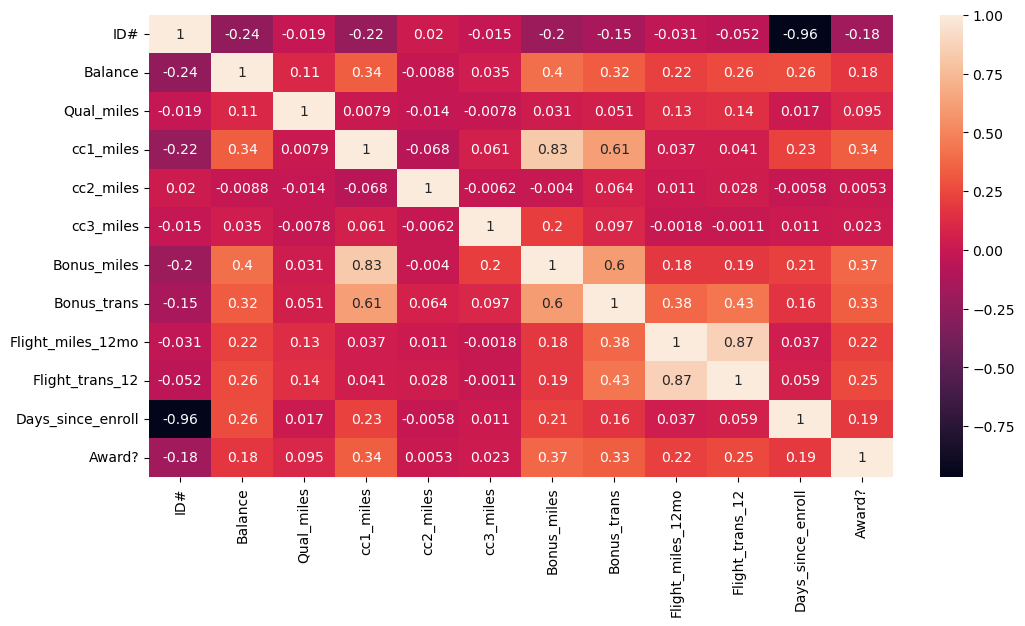

In [82]:
plt.figure(figsize=(12, 6))
sns.heatmap(df.corr(), annot=True)
plt.show()

In [83]:
#STANDARD SCALER

In [84]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)

In [85]:
#K_Means - Elbow Method

In [86]:
x = df.values[:, [0, 5, 6, 7, 8, 9]]

In [87]:
x

array([[    1,     1,   174,     1,     0,     0],
       [    2,     1,   215,     2,     0,     0],
       [    3,     1,  4123,     4,     0,     0],
       ...,
       [ 4019,     1, 25447,     8,     0,     0],
       [ 4020,     1,   500,     1,   500,     1],
       [ 4021,     1,     0,     0,     0,     0]], dtype=int64)

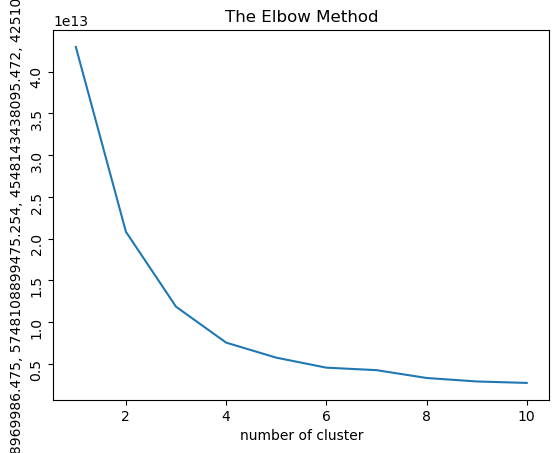

In [133]:
from sklearn.cluster import KMeans
wsse = []
for i in range (1,11):
    model = KMeans(n_clusters=i, random_state=10)
    model.fit(x)
    wsse.append(model.inertia_)
plt.Figure(figsize=(15,6))
plt.plot(range(1, 11), wsse)
plt.title("The Elbow Method")
plt.xlabel("number of cluster")
plt.ylabel(wsse)
plt.yticks(rotation= 90)
plt.show()


In [89]:
model = KMeans(n_clusters=3, random_state=10)
Y_pred = model.fit_predict(x)

In [90]:
Y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [91]:
df['Clusters'] = Y_pred
df.head(10)

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,Clusters
0,1,28143,0,1,1,1,174,1,0,0,7000,0,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,1
5,6,16420,0,1,1,1,0,0,0,0,6942,0,0
6,7,84914,0,3,1,1,27482,25,0,0,6994,0,1
7,8,20856,0,1,1,1,5250,4,250,1,6938,1,0
8,9,443003,0,3,2,1,1753,43,3850,12,6948,1,0
9,10,104860,0,3,1,1,28426,28,1150,3,6931,1,1


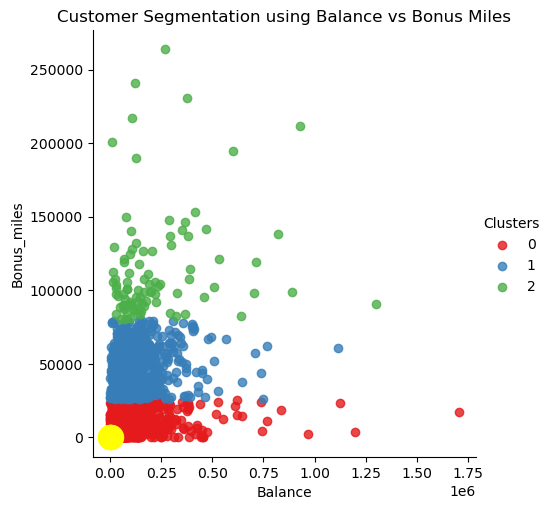

In [92]:
sns.lmplot(data=df , x ='Balance',y = 'Bonus_miles',
           fit_reg=False, # No Regression Line
           hue="Clusters",palette='Set1')
plt.scatter(model.cluster_centers_[:,0],model.cluster_centers_[:,1],
            s=300, c='yellow')
plt.title("Customer Segmentation using Balance vs Bonus Miles")
plt.show()

In [93]:
df['Clusters']= df.Clusters.map({0:'standard', 1:'sensible',2:'Target'})

In [94]:
df_new = df[df['Clusters']== 'Target']

In [95]:
df_new

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,Clusters
94,97,185549,0,5,1,1,110859,39,2950,16,6778,1,Target
121,124,205126,0,5,1,1,126630,45,2250,10,7668,1,Target
126,129,602064,0,5,1,1,194753,26,2250,10,7652,1,Target
151,154,930410,0,5,1,1,211284,18,2250,6,7640,1,Target
190,194,123516,0,5,1,1,240544,31,500,2,7507,1,Target
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3338,3361,84148,0,1,1,5,84148,7,0,0,1054,0,Target
3429,3452,133351,0,5,1,1,84215,43,7000,22,1529,1,Target
3594,3617,27619,0,4,1,1,83726,68,14050,46,1325,1,Target
3772,3795,822321,0,5,1,1,138334,26,600,2,3288,1,Target


In [96]:
df.to_csv("elbow_method_op.csv", index=False)

In [97]:
#hierarchical clustering

In [98]:
df =pd.read_excel("EastWestAirlines.xlsx", sheet_name='data')

In [99]:
df.dtypes

ID#                  int64
Balance              int64
Qual_miles           int64
cc1_miles            int64
cc2_miles            int64
cc3_miles            int64
Bonus_miles          int64
Bonus_trans          int64
Flight_miles_12mo    int64
Flight_trans_12      int64
Days_since_enroll    int64
Award?               int64
dtype: object

In [100]:
df['Balance'] = df['Balance'].astype('Float64')

In [101]:
print(df['Balance'].nunique())

3904


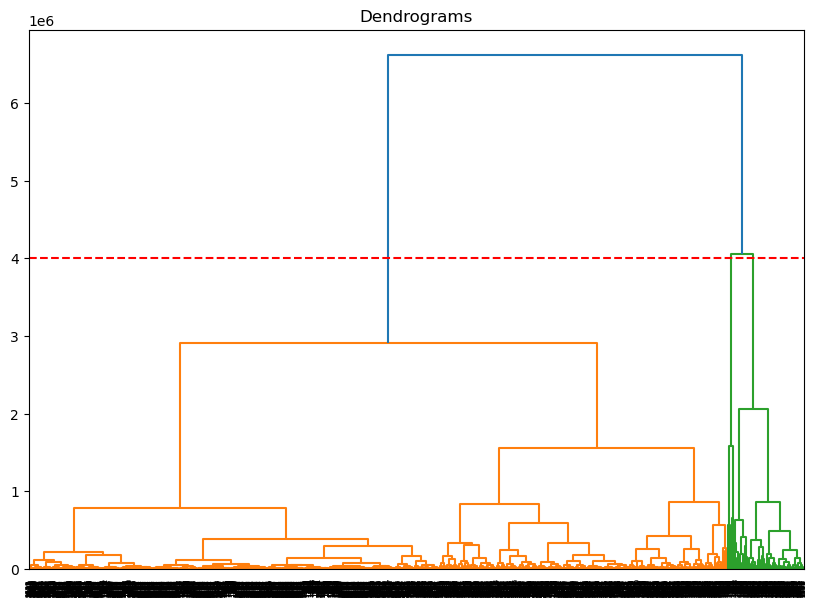

In [102]:
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(10,7))
plt.title("Dendrograms")
dend = shc.dendrogram(shc.linkage(df, method="ward"))
plt.axhline(y=4000000, color='r',linestyle='--')
plt.show()

In [103]:
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters=3, metric='euclidean', linkage='ward')
Y_pred = cluster.fit_predict(df)

In [104]:
print(len(df))
print(len(Y_pred))

3999
3999


In [105]:
df['cluster']=Y_pred
df.head(30)

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,cluster
0,1,28143.0,0,1,1,1,174,1,0,0,7000,0,0
1,2,19244.0,0,1,1,1,215,2,0,0,6968,0,0
2,3,41354.0,0,1,1,1,4123,4,0,0,7034,0,0
3,4,14776.0,0,1,1,1,500,1,0,0,6952,0,0
4,5,97752.0,0,4,1,1,43300,26,2077,4,6935,1,0
5,6,16420.0,0,1,1,1,0,0,0,0,6942,0,0
6,7,84914.0,0,3,1,1,27482,25,0,0,6994,0,0
7,8,20856.0,0,1,1,1,5250,4,250,1,6938,1,0
8,9,443003.0,0,3,2,1,1753,43,3850,12,6948,1,1
9,10,104860.0,0,3,1,1,28426,28,1150,3,6931,1,0


In [106]:
df['cluster'].value_counts()

cluster
0    3610
1     363
2      26
Name: count, dtype: int64

In [107]:
cluster_0_df = df[df["cluster"]==0]
print(cluster_0_df.shape)
cluster_0_df.head()

(3610, 13)


,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,cluster
0,1,28143.0,0,1,1,1,174,1,0,0,7000,0,0
1,2,19244.0,0,1,1,1,215,2,0,0,6968,0,0
2,3,41354.0,0,1,1,1,4123,4,0,0,7034,0,0
3,4,14776.0,0,1,1,1,500,1,0,0,6952,0,0
4,5,97752.0,0,4,1,1,43300,26,2077,4,6935,1,0


In [108]:
cluster_1_df = df[df["cluster"]==1]
print(cluster_1_df.shape)
cluster_1_df.head()

(363, 13)


,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,cluster
8,9,443003.0,0,3,2,1,1753,43,3850,12,6948,1,1
21,22,185681.0,2024,1,1,1,13300,16,1800,9,6896,1,1
24,25,205651.0,500,1,1,1,4025,21,700,4,7932,0,1
30,31,177926.0,0,3,1,1,20797,13,0,0,7886,0,1
32,33,276571.0,0,4,1,1,42044,23,0,0,7872,0,1


In [109]:
cluster_2_df = df[df['cluster']==2]
print(cluster_2_df.shape)
cluster_2_df.head()

(26, 13)


,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,cluster
43,44,619393.0,0,3,1,1,15008,14,0,0,7819,1,2
87,90,609477.0,0,3,1,1,21422,22,1200,8,6820,0,2
117,120,969559.0,0,1,1,1,2500,3,1000,2,7718,1,2
151,154,930410.0,0,5,1,1,211284,18,2250,6,7640,1,2
186,190,707079.0,0,4,1,1,57173,40,3450,12,7523,1,2


In [110]:
df['cluster'] =df['cluster'].map({0:"Negative", 1:"Neutral", 2:"Positive"})
df.head(20)

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,cluster
0,1,28143.0,0,1,1,1,174,1,0,0,7000,0,Negative
1,2,19244.0,0,1,1,1,215,2,0,0,6968,0,Negative
2,3,41354.0,0,1,1,1,4123,4,0,0,7034,0,Negative
3,4,14776.0,0,1,1,1,500,1,0,0,6952,0,Negative
4,5,97752.0,0,4,1,1,43300,26,2077,4,6935,1,Negative
5,6,16420.0,0,1,1,1,0,0,0,0,6942,0,Negative
6,7,84914.0,0,3,1,1,27482,25,0,0,6994,0,Negative
7,8,20856.0,0,1,1,1,5250,4,250,1,6938,1,Negative
8,9,443003.0,0,3,2,1,1753,43,3850,12,6948,1,Neutral
9,10,104860.0,0,3,1,1,28426,28,1150,3,6931,1,Negative


In [111]:
df.to_csv("hierarchical_op.csv", index=False)

In [112]:
#DBSCAN

In [113]:
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors

In [114]:
x = df[['Balance',	'Bonus_miles',	'Bonus_trans', 	'Flight_miles_12mo', 'Flight_trans_12', 'Days_since_enroll']]

In [115]:
x

,Balance,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll
0,28143.0,174,1,0,0,7000
1,19244.0,215,2,0,0,6968
2,41354.0,4123,4,0,0,7034
3,14776.0,500,1,0,0,6952
4,97752.0,43300,26,2077,4,6935
...,...,...,...,...,...,...
3994,18476.0,8525,4,200,1,1403
3995,64385.0,981,5,0,0,1395
3996,73597.0,25447,8,0,0,1402
3997,54899.0,500,1,500,1,1401


In [116]:
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

In [117]:
n = NearestNeighbors(n_neighbors=5)
nbrs = n.fit(x_scaled)
distance, indices = nbrs.kneighbors(x_scaled)
distance = np.sort(distance[:, 4])


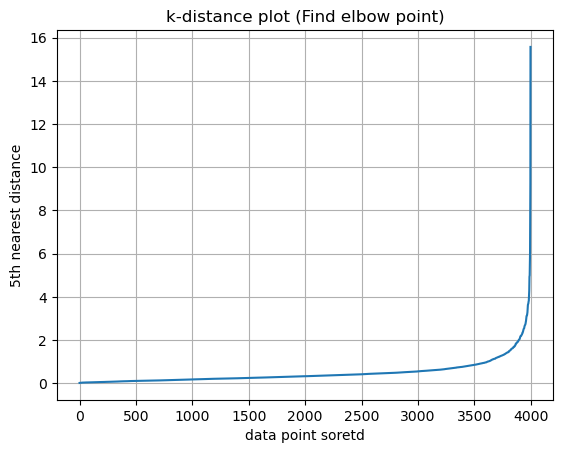

In [118]:
plt.plot(distance)
plt.title("k-distance plot (Find elbow point)")
plt.xlabel("data point soretd")
plt.ylabel("5th nearest distance")
plt.grid(True)
plt.show()

In [119]:
db = DBSCAN(eps=6, min_samples = 6)
db.fit(x_scaled)

DBSCAN(eps=6, min_samples=6)

In [120]:
df["cluster"] = db.labels_
print(df.head())

   ID#  Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  Bonus_miles  \
0    1  28143.0           0          1          1          1          174   
1    2  19244.0           0          1          1          1          215   
2    3  41354.0           0          1          1          1         4123   
3    4  14776.0           0          1          1          1          500   
4    5  97752.0           0          4          1          1        43300   

   Bonus_trans  Flight_miles_12mo  Flight_trans_12  Days_since_enroll  Award?  \
0            1                  0                0               7000       0   
1            2                  0                0               6968       0   
2            4                  0                0               7034       0   
3            1                  0                0               6952       0   
4           26               2077                4               6935       1   

   cluster  
0        0  
1        0  
2        0 

In [121]:
df["cluster"].value_counts()

cluster
 0    3997
-1       2
Name: count, dtype: int64

In [122]:
noise_ratio = df["cluster"].value_counts().get(-1, 0)/len(df)
print(f"noise ratio: {noise_ratio: 2%}")

noise ratio:  0.050013%


In [123]:
n_cluster = len(set(db.labels_)) - (1 if -1 in db.labels_ else 0)
print(f"Total cluster formed: {n_cluster}")

Total cluster formed: 1


In [124]:
df["cluster"] = db.labels_
print(df["cluster"].value_counts())

cluster
 0    3997
-1       2
Name: count, dtype: int64


In [125]:
df.groupby("cluster").mean()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
cluster,,,,,,,,,,,,
-1,2819.000000,106673.0,694.00000,2.500000,1.000000,1.000000,76325.000000,75.500000,26458.500000,49.000000,2602.000000,1.000000
0,2014.417063,73584.779335,143.83938,2.059294,1.014511,1.012259,17115.233925,11.569927,447.046785,1.349762,4119.318239,0.370028


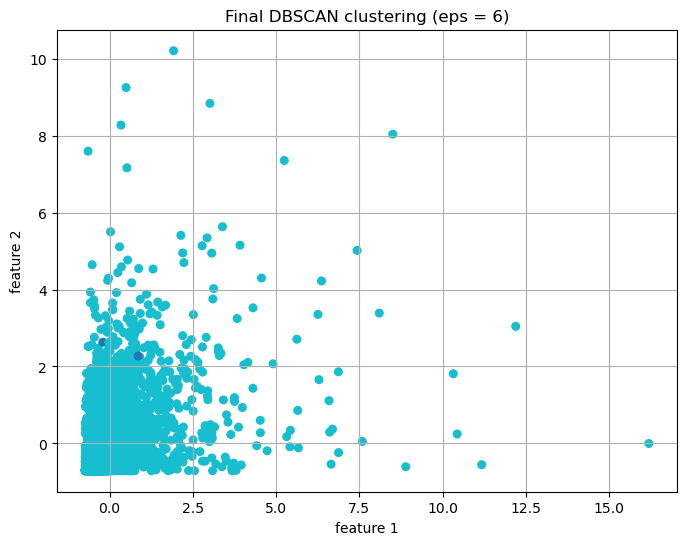

In [126]:
plt.figure(figsize=(8, 6))
plt.scatter(x_scaled[:, 0], x_scaled[:, 1],
c=db.labels_, cmap='tab10', s =30)
plt.title("Final DBSCAN clustering (eps = 6)")
plt.xlabel("feature 1")
plt.ylabel("feature 2")
plt.grid(True)
plt.show()

In [127]:
df.to_csv("DBSCAN_output.csv", index=False)